### Question 1 ###
### Source ###
https://archive.ics.uci.edu/ml/datasets/Parkinsons

##### From Source#####
"This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD".

"The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column"

### Attribute Information: ###

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:
DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [337]:
from sklearn import tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree



#fileURL="http://localhost:8888/tree/data/raw_tac/BK7610 CAM Results.xlsx"
#fileURL2="https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data"
fileURL3="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
#fileURL4="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.names"
#fileURL5="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
#fileURL6="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons_updrs.names"

#data=pd.read_csv(fileURL, names=[], header=None)
#data2=pd.read_csv(fileURL2, names=[], header=None)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)


data3=pd.read_csv(fileURL3, names=["name","MDVP:Fo(Hz)", "MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)", "MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP", "MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"], header=None)
#data5=pd.read_csv(fileURL4, names=[], header=None)
#data6=pd.read_csv(fileURL5, names=[], header=None)

#data3=pd.read_csv(fileURL3, names=[], header=None)

In [338]:
data3

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,phon_R01_S01_6,120.55200,131.16200,113.78700,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.45600,0.02328,0.03526,0.03243,0.06985,0.01222,21.37800,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
7,phon_R01_S02_1,120.26700,137.24400,114.82000,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.14000,0.00779,0.00937,0.01351,0.02337,0.00607,24.88600,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
8,phon_R01_S02_2,107.33200,113.84000,104.31500,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.13400,0.00829,0.00946,0.01256,0.02487,0.00344,26.89200,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
9,phon_R01_S02_3,95.73000,132.06800,91.75400,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.19100,0.01073,0.01277,0.01717,0.03218,0.01070,21.81200,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571


In [339]:
data4=data3.drop([0])

data4.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [340]:
data4

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,phon_R01_S01_6,120.55200,131.16200,113.78700,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.45600,0.02328,0.03526,0.03243,0.06985,0.01222,21.37800,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
7,phon_R01_S02_1,120.26700,137.24400,114.82000,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.14000,0.00779,0.00937,0.01351,0.02337,0.00607,24.88600,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
8,phon_R01_S02_2,107.33200,113.84000,104.31500,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.13400,0.00829,0.00946,0.01256,0.02487,0.00344,26.89200,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
9,phon_R01_S02_3,95.73000,132.06800,91.75400,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.19100,0.01073,0.01277,0.01717,0.03218,0.01070,21.81200,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
10,phon_R01_S02_4,95.05600,120.10300,91.22600,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.25500,0.01441,0.01725,0.02444,0.04324,0.01022,21.86200,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [469]:
a_sample_parkinson_patient=data4.head(6)
a_sample_parkinson_patient

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,phon_R01_S01_1,119.992,157.302,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.400,148.650,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.682,131.111,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.676,137.871,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.014,141.781,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,phon_R01_S01_6,120.552,131.162,113.78700,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [470]:
a_sample_non_parkinsons_patient=data4.tail(6)
a_sample_non_parkinsons_patient

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_1,201.774,262.707,78.22800,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,0.255,0.01454,0.01582,0.01758,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
191,phon_R01_S50_2,174.188,230.978,94.26100,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
192,phon_R01_S50_3,209.516,253.017,89.48800,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
193,phon_R01_S50_4,174.688,240.005,74.28700,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
194,phon_R01_S50_5,198.764,396.961,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
195,phon_R01_S50_6,214.289,260.277,77.97300,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [343]:
data9=data4.drop(columns=['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','RPDE','DFA','D2'])
data9

,name,MDVP:Fo(Hz),NHR,HNR,status,spread1,spread2,PPE
1,phon_R01_S01_1,119.99200,0.02211,21.03300,1,-4.813031,0.266482,0.284654
2,phon_R01_S01_2,122.40000,0.01929,19.08500,1,-4.075192,0.335590,0.368674
3,phon_R01_S01_3,116.68200,0.01309,20.65100,1,-4.443179,0.311173,0.332634
4,phon_R01_S01_4,116.67600,0.01353,20.64400,1,-4.117501,0.334147,0.368975
5,phon_R01_S01_5,116.01400,0.01767,19.64900,1,-3.747787,0.234513,0.410335
6,phon_R01_S01_6,120.55200,0.01222,21.37800,1,-4.242867,0.299111,0.357775
7,phon_R01_S02_1,120.26700,0.00607,24.88600,1,-5.634322,0.257682,0.211756
8,phon_R01_S02_2,107.33200,0.00344,26.89200,1,-6.167603,0.183721,0.163755
9,phon_R01_S02_3,95.73000,0.01070,21.81200,1,-5.498678,0.327769,0.231571
10,phon_R01_S02_4,95.05600,0.01022,21.86200,1,-5.011879,0.325996,0.271362


### Question 2 ###
The features are numeric and categorical according to "status" column which is set to 0 for healthy and 1 for Parkinsons Disease. No missing data from what I see here. Some of the relationships between people w/wo parkinsons disease and their range of biomedical voice measurements are shown below. 


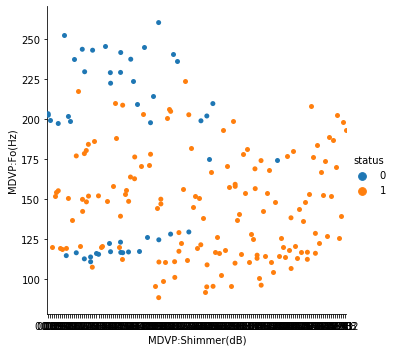

In [419]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
data4["MDVP:Shimmer(dB)"]=pd.to_numeric(data4["MDVP:Shimmer(dB)"])

#data4.NHR=pd.to_numeric(data4.NHR)

sns.catplot(x='MDVP:Shimmer(dB)', y='MDVP:Fo(Hz)', hue="status", data=data4)

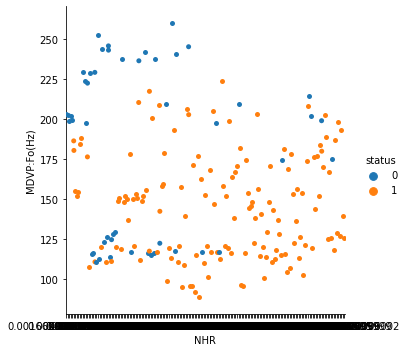

In [345]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
data4.NHR=pd.to_numeric(data4.NHR)

sns.catplot(x='NHR', y='MDVP:Fo(Hz)', hue="status", data=data4)

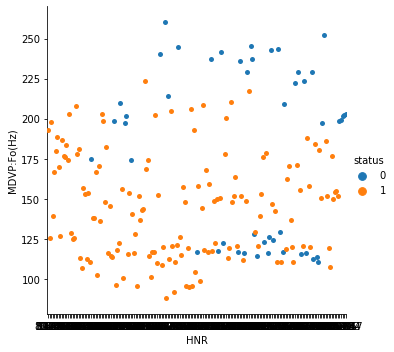

In [346]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
#data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.HNR=pd.to_numeric(data4.HNR)

sns.catplot(x='HNR', y='MDVP:Fo(Hz)', hue="status", data=data4)

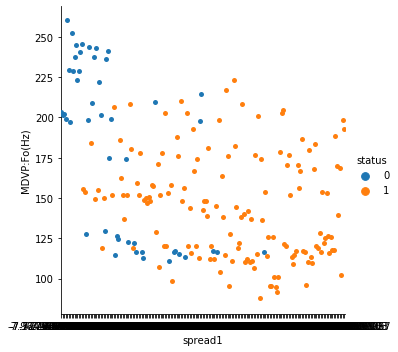

In [347]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
#data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.spread1=pd.to_numeric(data4.spread1)

sns.catplot(x='spread1', y='MDVP:Fo(Hz)', hue="status", data=data4)

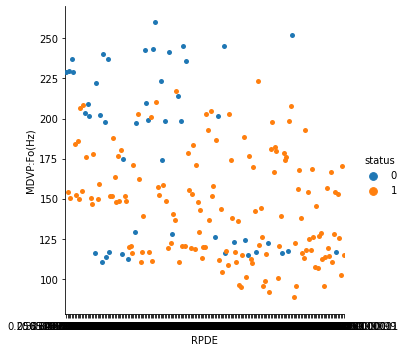

In [348]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
#data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.RPDE=pd.to_numeric(data4.RPDE)

sns.catplot(x='RPDE', y='MDVP:Fo(Hz)', hue="status", data=data4)

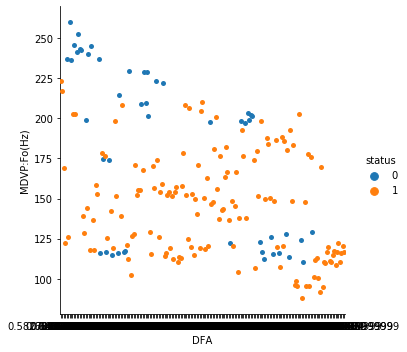

In [349]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
#data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.DFA=pd.to_numeric(data4.DFA)

sns.catplot(x='DFA', y='MDVP:Fo(Hz)', hue="status", data=data4)

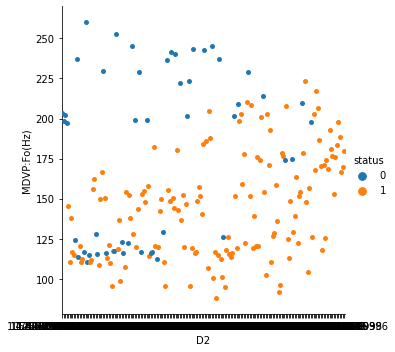

In [350]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
#data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.D2=pd.to_numeric(data4.D2)

sns.catplot(x='D2', y='MDVP:Fo(Hz)', hue="status", data=data4)

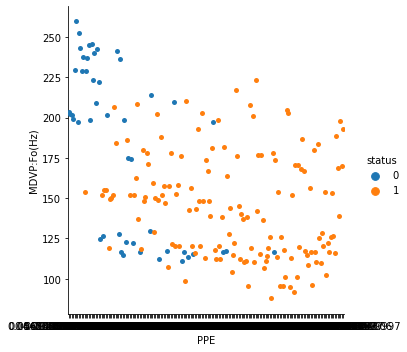

In [351]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])
#data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.PPE=pd.to_numeric(data4.PPE)

sns.catplot(x='PPE', y='MDVP:Fo(Hz)', hue="status", data=data4)

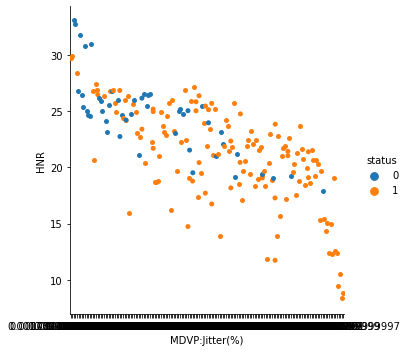

In [352]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4.HNR=pd.to_numeric(data4.HNR)

sns.catplot(x='MDVP:Jitter(%)', y='HNR', hue="status", data=data4)

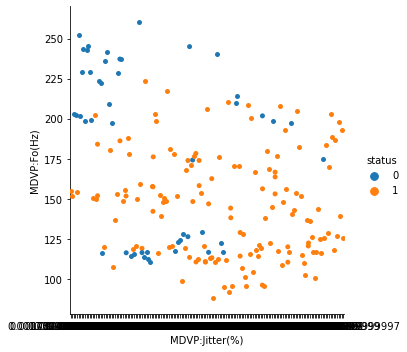

In [353]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Fo(Hz)"]=pd.to_numeric(data4["MDVP:Fo(Hz)"])

#data4.HNR=pd.to_numeric(data4.HNR)

sns.catplot(x='MDVP:Jitter(%)', y='MDVP:Fo(Hz)', hue="status", data=data4)

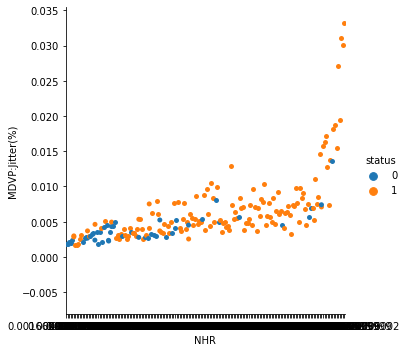

In [363]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4.NHR=pd.to_numeric(data4.NHR)

sns.catplot(x='NHR', y='MDVP:Jitter(%)', hue="status", data=data4)

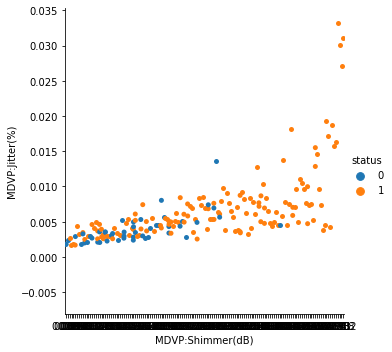

In [398]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Shimmer(dB)"]=pd.to_numeric(data4["MDVP:Shimmer(dB)"])

#data4.NHR=pd.to_numeric(data4.NHR)

sns.catplot(x='MDVP:Shimmer(dB)', y='MDVP:Jitter(%)', hue="status", data=data4)

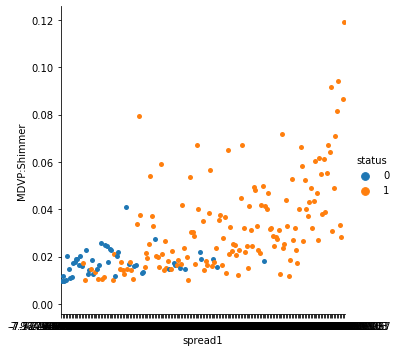

In [365]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.spread1=pd.to_numeric(data4.spread1)

sns.catplot(x='spread1', y='MDVP:Shimmer', hue="status", data=data4)

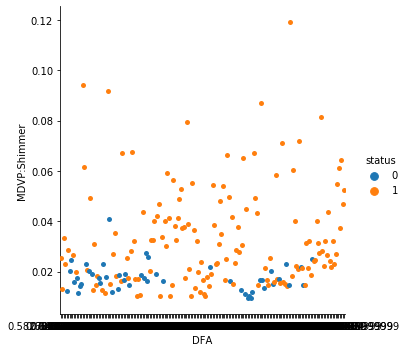

In [366]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.DFA=pd.to_numeric(data4.DFA)

sns.catplot(x='DFA', y='MDVP:Shimmer', hue="status", data=data4)

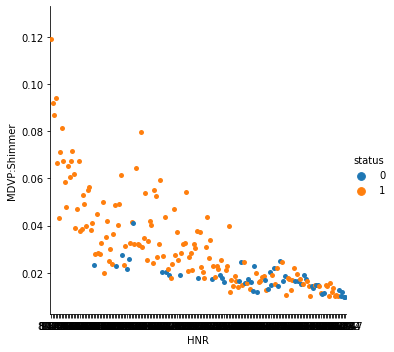

In [367]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.HNR=pd.to_numeric(data4.HNR)

sns.catplot(x='HNR', y='MDVP:Shimmer', hue="status", data=data4)

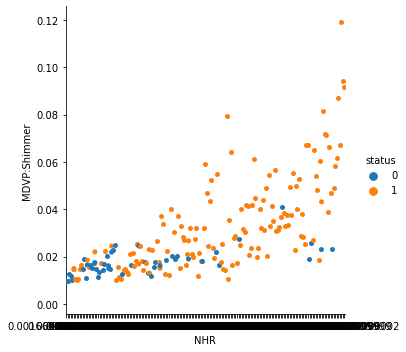

In [368]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.NHR=pd.to_numeric(data4.NHR)

sns.catplot(x='NHR', y='MDVP:Shimmer', hue="status", data=data4)

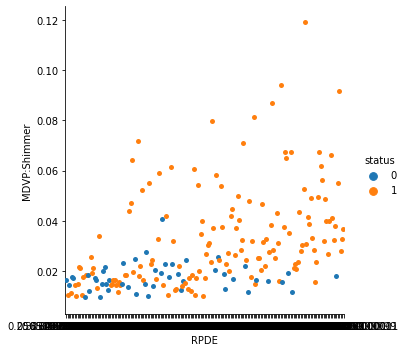

In [369]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#data4["MDVP:Jitter(%)"]=pd.to_numeric(data4["MDVP:Jitter(%)"])
data4["MDVP:Shimmer"]=pd.to_numeric(data4["MDVP:Shimmer"])

data4.RPDE=pd.to_numeric(data4.RPDE)

sns.catplot(x='RPDE', y='MDVP:Shimmer', hue="status", data=data4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a345ac110>,
      dtype=object)

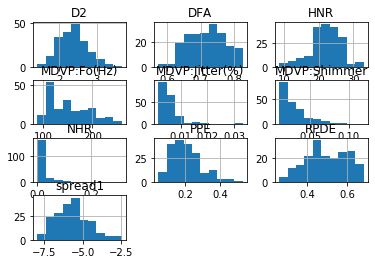

In [370]:

data4.hist()

From the data above, theres no perfect combination of features that can help clearly distinguish between people w/wo parkinsons without prior knowledge of the subject material. Decent combinations for the predictions are those with spread out clusters. I chose MDVP:Fo(Hz) and HNR for my analysis. Also MDVP:Fo(Hz) and MDVP:Shimmer(dB). They seem to do a decent job of distinguishing patients w/wo parkinsons based on my research

### Question 3 and Question 4###

In order to create my model, I picked the features that had a somewhat decent spread in distingushing between parkinsons and non-parkinsons patients which were 'MDVP:Fo(Hz)' and 'HNR' and also MDVP:Fo(Hz) and MDVP:Shimmer(dB). According to Félix JavierJiménez-Jiménez et al in the "Acoustic voice analysis in untreated patients with Parkinson's disease" paper, they say,
"When compared to controls, PD patients showed higher jitter and shimmer, lower HN ratio, and lower frequency variability of the sentence in the microphonic signal and reported a higher frequency of presence of low voice intensity, monopitch, harshness, voice arrests, and tremor". These can be seen in our data for MDVP:Shimmer(dB) vs MDVP:Fo(Hz).From our data, Higher shimmer and low average vocal frequencies were recorded in parkinsons patients. Lower HNR/HN values were also seen in our data for patients with parkinsons

According to MayoClinic regarding speech changes from people with Parkinsons, "You may speak softly, quickly, slur or hesitate before talking. Your speech may be more of a monotone rather than with the usual inflections". I assume that's the reason there are midrange MDVP:Fo(Hz) readings and little variation in the MDVP:Fo(Hz) readings for parkinsons patients because of their inability to modulate their speech

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


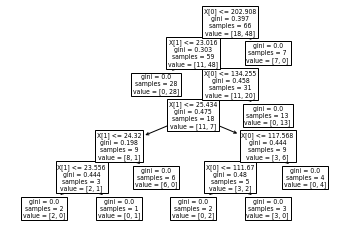

In [371]:
from sklearn.model_selection import train_test_split
#X = dataold.as_matrix(["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)", "MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP", "MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"])
X = dataold.as_matrix(['MDVP:Fo(Hz)', 'HNR'])
#X = dataold.as_matrix(['MDVP:Fo(Hz)'])

#X = dataold.astype(float)
Y = dataold['status'].values.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66, random_state=42)
clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, Y_train)
clf2=tree.plot_tree(clf.fit(X_train, Y_train)) 


In [372]:
import graphviz 
names=list(dataold.columns.values)
names

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [373]:
data100=data4.drop(columns=['HNR','status','name','spread1','spread2','PPE','NHR','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','RPDE','DFA','D2'])
data100

,MDVP:Fo(Hz)
1,119.992
2,122.400
3,116.682
4,116.676
5,116.014
6,120.552
7,120.267
8,107.332
9,95.730
10,95.056


In [374]:
datanew=data4.drop(columns=['status','name','spread1','spread2','PPE','NHR','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','RPDE','DFA','D2'])
datanew

,MDVP:Fo(Hz),HNR
1,119.992,21.033
2,122.400,19.085
3,116.682,20.651
4,116.676,20.644
5,116.014,19.649
6,120.552,21.378
7,120.267,24.886
8,107.332,26.892
9,95.730,21.812
10,95.056,21.862


In [375]:
dataoldnew=dataold.drop(columns=['name'])

In [376]:
print(type(clf.classes_))

<class 'numpy.ndarray'>


In [377]:
clf.classes_

array([0, 1])

In [378]:
import numpy as np
s=[]
for i in clf.classes_:
    s.append(str(i))
print(np.array2string(clf.classes_))
print(s)


[0 1]
['0', '1']


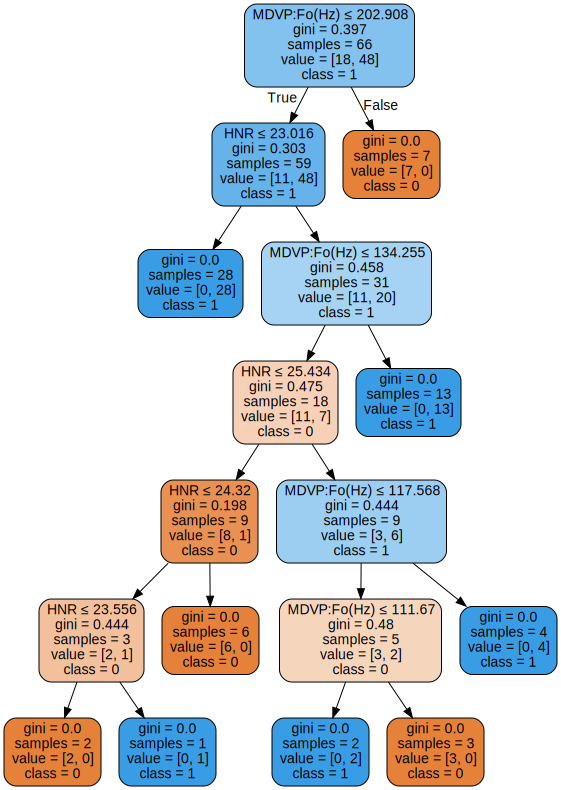

In [379]:
dot_data=export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=datanew.columns, class_names=s)
#dot_data=export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=False, impurity=False)
graph = graphviz.Source(dot_data)  
graph


### Question 5###


In [471]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

kNeighborsForNewInstance=neighbors.KNeighborsClassifier()
kNeighborsForNewInstance.fit(X_train,Y_train)
print(kNeighborsForNewInstance)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [472]:
print(kNeighborsForNewInstance.predict([[107.3,100.3]]))


[0]


In [383]:
print(kNeighborsForNewInstance.predict([[107.3,20.5]]))


[1]


In [465]:
print(kNeighborsForNewInstance.predict([[240.3,100.3]]))


[0]


In [464]:
print(kNeighborsForNewInstance.predict([[240.3,20.5]]))


[0]


For a patient with MDVP:Fo(Hz) and HNR of  107.3,100.3 respectively, the model checks if 107.3<MDVP:Fo(Hz)<202.908. Then the model goes to the next level in the tree, 100.3> HNR > 23.016. Then the model goes to the next level in the tree, 107.3 < MDVP:Fo(Hz) < 134.255. Then the model goes to the next level in the tree, 100.3 > HNR > 25.434. Then the model goes to the next level in the tree, 107.3 < MDVP:Fo(Hz) < 117.568.  Then the model goes to the next level in the tree, 107.3 < MDVP:Fo(Hz) < 111.67. With a gini impurity of 0.0 the model should pick a parkinsons patient but picks a healthy patient instead. This is unexpected 

For a patient with MDVP:Fo(Hz) and HNR of  107.3,20.5 respectively, the model checks if 107.3<MDVP:Fo(Hz)<202.908. Then the model goes to the next level in the tree, 20.5> HNR > 23.016. The model predicts that the patient has parkinsons

For a patient with MDVP:Fo(Hz) and HNR of  240.3,20.5 and 240.3 and 100.3 respectively, the model checks if 240.3>MDVP:Fo(Hz)>202.908.  The model predicts that the patient is healthy in both cases. 

Lower HNR values and lower MDVP:Fo(Hz) values indicate possible parkinsons disease

For high MDVP:Fo(Hz) values > 200 combined with high or low HNR values, there is a good chance that a patient is healthy

Non parkinsons patients can be found inbetween these high or low ranges for MDVP:Fo(Hz) values and low ranges of HNR values



#### Revisiting/Playing with parameters. MDVP:Shimmer(dB) vs MDVP:Fo(Hz) #### 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


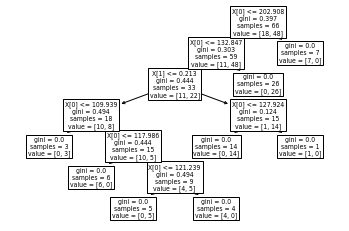

In [420]:
from sklearn.model_selection import train_test_split
#X = dataold.as_matrix(["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)", "MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP", "MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"])
X_2 = data4.as_matrix(['MDVP:Fo(Hz)', 'MDVP:Shimmer(dB)'])
#X = dataold.as_matrix(['MDVP:Fo(Hz)'])

#X = dataold.astype(float)
Y_2 = data4['status'].values.tolist()

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.66, random_state=42)
clf3 = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, Y_train)
clf4=tree.plot_tree(clf3.fit(X_train_2, Y_train_2)) 

In [421]:
datasj=data4.drop(columns=['HNR','MDVP:Jitter(%)','status','name','spread1','spread2','PPE','NHR','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','RPDE','DFA','D2'])
datasj

,MDVP:Fo(Hz),MDVP:Shimmer(dB)
1,119.992,0.426
2,122.400,0.626
3,116.682,0.482
4,116.676,0.517
5,116.014,0.584
6,120.552,0.456
7,120.267,0.140
8,107.332,0.134
9,95.730,0.191
10,95.056,0.255


In [441]:
import numpy as np
a=[]
for i in clf3.classes_:
    a.append(str(i))
print(np.array2string(clf3.classes_))
print(a)

['0' '1']
['0', '1']


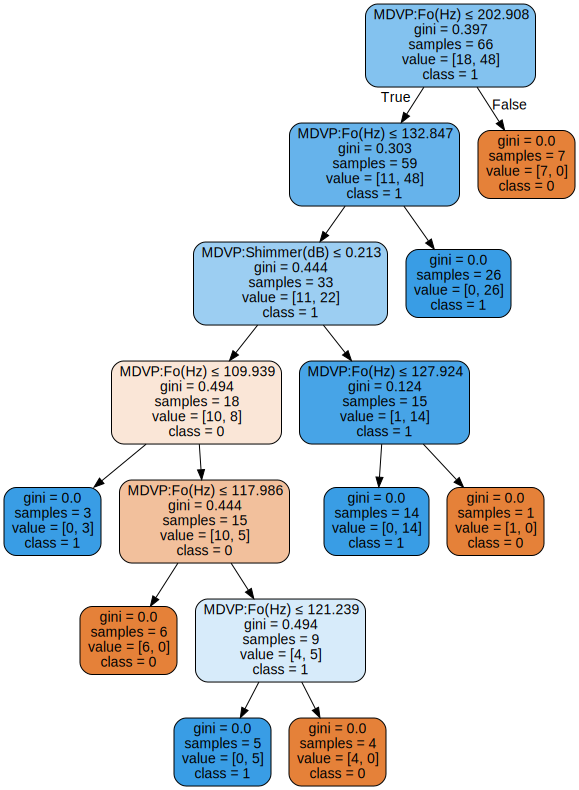

In [475]:
dot_data3=export_graphviz(clf3, out_file=None, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=datasj.columns, class_names=a)
#dot_data=export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=False, impurity=False)
graph2 = graphviz.Source(dot_data3)  
graph2

In [443]:
kNeighborsForNewInstance_2=neighbors.KNeighborsClassifier()
kNeighborsForNewInstance_2.fit(X_train_2,Y_train_2)
print(kNeighborsForNewInstance_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [453]:
#print(X_train_2)

#print(Y_train_2)
print(kNeighborsForNewInstance_2.predict([[240, 0.1]]))


['0']


In [467]:
print(kNeighborsForNewInstance_2.predict([[240,0.8]]))


['0']


In [462]:
print(kNeighborsForNewInstance_2.predict([[130,0.1]]))


['0']


In [466]:
print(kNeighborsForNewInstance_2.predict([[130,0.5]]))


['0']


In [468]:
print(kNeighborsForNewInstance_2.predict([[180,0.5]]))


['1']


For a patient with MDVP:Fo(Hz) and MDVP:Shimmer(dB) of  240,0.1 and 240,0.8 respectively, the model checks if 240>MDVP:Fo(Hz)>202.908 thus the model predicts that the patient is healthy in both cases.


For a patient with MDVP:Fo(Hz) and MDVP:Shimmer(dB) of 130,0.1 respectively, the model checks if 130<MDVP:Fo(Hz)< 202.908. Then the model goes to the next level in the tree, 130<MDVP:Fo(Hz)<132.847. Then the model goes to the next level, 0.1<MDVP:Shimmer(dB)<0.213. Then the model goes to the next level, 130 > MDVP:Fo(Hz) > 109.939. Then the model goes to the next level, 130 > MDVP:Fo(Hz) > 117.986. THen the model goes to the next level, 130 > MDVP:Fo(Hz) >  121.239. Then with a gini impurity of 0.0, the model predicts that the patient is healthy.

For a patient with MDVP:Fo(Hz) and MDVP:Shimmer(dB) of 180,0.5 respectively, the model checks if 180<MDVP:Fo(Hz)< 202.908. Then the model goes to the next level in the tree, 180>MDVP:Fo(Hz)>132.847. Then the model goes to the next level,Then with a gini impurity of 0.0, the model predicts that the patient has parkinsons. 


Low shimmer values along with high or low MDVP:Fo(Hz) values could indicate healthy patients. Parkinsons patients can be found inbetween these high or low MDVP:Fo(Hz) ranges combined with higher Shimmer values 

Most of the results from both models seem to be consistent with our analysis references above.


### References ###
https://www.sciencedirect.com/science/article/abs/pii/S1353802097000072
https://www.mayoclinic.org/diseases-conditions/parkinsons-disease/symptoms-causes/syc-20376055